###  inicio

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
file_string = "./imagens/documentos/cursivo.png"
gmap = plt.cm.gray
line_dir = "./imagens/linhas/"
word_dir = "./imagens/palavras/"

### img

In [4]:
def up_to_binarization(file:str):
    img = cv.imread(file)
    img_inverted = cv.bitwise_not(img)
    img_gs = cv.cvtColor(img_inverted, cv.COLOR_RGB2GRAY)
    
    _, img_otsu = cv.threshold(img_gs, 128, 255, cv.THRESH_OTSU)
    #https://matplotlib.org/stable/users/explain/colors/colormaps.html

    return img_otsu, img.shape[0], img.shape[1]

481 1914


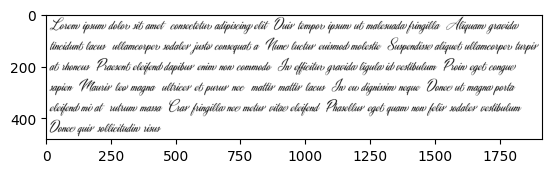

In [5]:
img, h, w = up_to_binarization(file_string)
print(h, w)
plt.imshow(img, cmap = gmap)

### Identificando o valor médio de uma área de texto intensa

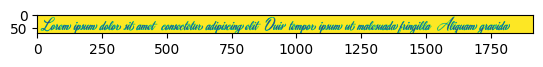

In [6]:
plt.imshow(img[0:70,])

In [7]:
def hor_density(img,h:int,w:int,min_h : int = 0,min_w : int = 0):
    most = 0
    least = 255
    avg_img = 0

    for y in range(min_h, h):
        sum = 0
        for x in range(min_w,w):
            sum += img[y][x]
        
        avg_line = sum/(w-min_w)
        avg_img += avg_line

        if avg_line > most:
            most = avg_line
        elif avg_line < least:
            least = avg_line
    
    avg_img = avg_img/(h-min_h)
    
    return avg_img, most, least


In [8]:
hor_density(img, 80, w)
#0,80

(231.74157523510968, 255.0, 160.4075235109718)

### Identificando o valor médio em uma área vazia

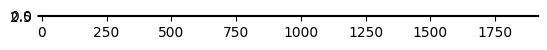

In [9]:
plt.imshow(img[71:75,])

In [10]:
hor_density(img, 75, w, 71)

(251.33620689655172, 251.8025078369906, 251.26959247648904)

### tentando selecionar linha automáticamente

In [11]:
nimg = np.zeros((h,w,1))

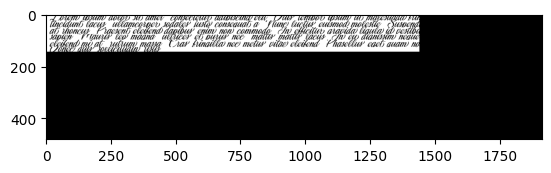

In [12]:
i=0
for y in range(0, h):
    sum = 0
    for x in range(0,w):
        sum += img[y][x]
    media_linha = sum/w
    if media_linha < 240:
        for x in range(0,1441):
            nimg[i][x] = img[y][x]
        i += 1
plt.imshow(nimg, cmap=gmap)

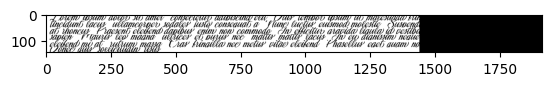

In [13]:

nimg = nimg[0:i,:]
plt.imshow(nimg, cmap=gmap)

### Selecionando Linha automaticamente

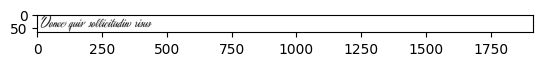

In [24]:
i=0
start = 0
end = 0
aux=[]

for y in range(0, h):
    sum = 0
    for x in range(0,w):
        sum += img[y][x]
    line_avg = sum/w
    if line_avg == 255:
        i+=1

        if i == 4:
            end = y

            if end - start > 15:
                n = aux.append(img[start:end, ])
                #print(start, end)

            start = end
        
        elif i>4:
            if line_avg == 255:
                i = 0
            
for i in range(0, len(aux)):
    plt.imshow(aux[i], cmap=gmap)
    plt.savefig(f"{line_dir}{i}.png",format="png")


### mesma coisa pras colunas agr

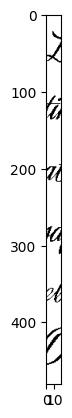

In [15]:
plt.imshow(img[:,20:40], cmap = plt.cm.gray)

In [16]:
def ver_density(img,h:int,w:int,min_h : int = 0,min_w : int = 0):
    most = 0
    least = 255
    avg_img = 0

    for x in range(min_w, w):
        sum = 0
        for y in range(min_h, h):
            sum += img[y][x]
        
        avg_col = sum/(h-min_h)
        avg_img += avg_col

        if avg_col > most:
            most = avg_col
        elif avg_col < least:
            least = avg_col
    
    avg_img = avg_img/(w-min_w)
    
    return avg_img, most, least

In [17]:
ver_density(img, h, 40, min_w = 20)

(224.22505197505194, 232.2037422037422, 217.8898128898129)

### media coluna com texto

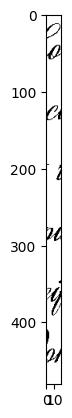

In [18]:
plt.imshow(img[:,50:70], cmap = plt.cm.gray)

In [19]:
ver_density(img,h,70,min_w=50)

(228.54573804573806, 235.3846153846154, 221.07068607068607)

In [20]:
maior = 0
menor = 255
media_img = 0
for x in range(50,70):
    sum = 0
    for y in range(0, h):
        sum += img[y][x]
    media_linha = sum/h
    media_img += media_linha
    if media_linha > maior:
        maior = media_linha
    if media_linha < menor:
        menor = media_linha
    print("{:.2f}".format(media_linha))#724
media_img = media_img/20
print(f"media {media_img} ||| maior {maior} ||| menor {menor}")

221.07
224.78
229.02
230.08
235.38
233.79
233.26
228.49
227.96
232.20
230.61
232.20
230.61
229.55
228.49
225.84
221.07
222.13
227.96
226.37
media 228.54573804573806 ||| maior 235.3846153846154 ||| menor 221.07068607068607


### achando colunas automaticamente

In [21]:
nimg_cols = np.zeros((i,1441,1))
j=0
media_coluna=0

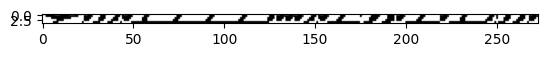

In [22]:
for x in range(0,1441):
    sum = 0
    for y in range(0, i):
        sum += nimg[y][x]
    media_coluna = sum/i
    if media_coluna < 255:
        for y in range(0,i):
            nimg_cols[y][j] = nimg[y][x]
        j+=1
nimg_cols = nimg_cols[:,0:j]
plt.imshow(nimg_cols, cmap=gmap)

### Encontrando palavras automaticamente

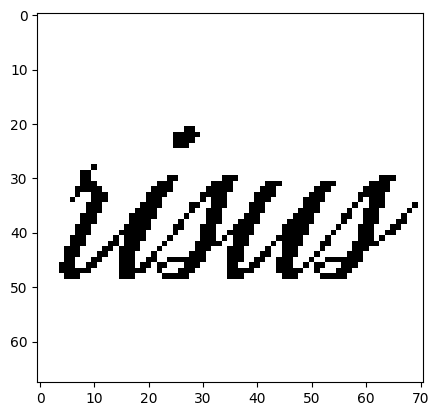

In [26]:
for k in range(0,len(aux)):
    im = aux[k]    
    h = im.shape[0]
    
    i=0
    
    inicial = 0
    final = 0
    palavras = []

    for x in range(0, w):
        sum = 0
        for y in range(0,h):
            sum += im[y][x]
        media_coluna = sum/h
        if media_coluna == 255:
            i+=1

            if i == 4:
                final = x

                if final - inicial > 5:
                    n = palavras.append(im[:, inicial:final])
                    #print(inicial, final)

                inicial = final
            
            elif i>4:
                if media_coluna == 255:
                    i = 0

    for i in range(0, len(palavras)):
        fig = plt.gcf()
        plt.imshow(palavras[i], cmap=gmap)
        plt.savefig(f"{word_dir}palavra-{k}-{i}.png",format="png")
        pass